# Day 08. Exercise 04
# Regression

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.model_selection import train_test_split, ShuffleSplit

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [2]:
df = pd.read_csv('data/checker_regression.csv')
df

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,NaN
1,user_1,62,28.0,NaN
2,user_1,62,28.0,NaN
3,user_1,62,28.0,NaN
4,user_1,62,28.0,NaN
...,...,...,...,...
72,user_31,128,NaN,-104.75
73,user_4,40,NaN,-175.60
74,user_6,15,NaN,-62.60
75,user_7,8,NaN,-115.50


In [4]:
df = df.fillna(0)

In [6]:
df

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,0.00
1,user_1,62,28.0,0.00
2,user_1,62,28.0,0.00
3,user_1,62,28.0,0.00
4,user_1,62,28.0,0.00
...,...,...,...,...
72,user_31,128,0.0,-104.75
73,user_4,40,0.0,-175.60
74,user_6,15,0.0,-62.60
75,user_7,8,0.0,-115.50


In [17]:
X = df.drop(['AVG(diff)','uid'], axis=1)
y = df['AVG(diff)']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [19]:
def crossval(estimator, X, y, n_splits=10):
    cv = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=21)
    scores = cross_validate(estimator, X, y,
                            scoring='neg_root_mean_squared_error', cv=cv,
                            n_jobs=-1, return_train_score=True)
    train_scores = np.negative(scores['train_score'])
    test_scores = np.negative(scores['test_score'])
    for train, test in zip(train_scores, test_scores):
        print(f'   train  -{train:-20.12f}   {"|"}   test  -{test:-20.12f}')
    print(f'\nAverage RMSE on crossval is {np.mean(test_scores)}')

In [20]:
linear_reg = LinearRegression()

In [21]:
param_grid = [{'fit_intercept': [True], 'normalize': [True, False]},
              {'fit_intercept': [False]}]

cv_linear_reg = GridSearchCV(linear_reg, param_grid,
                             scoring='neg_root_mean_squared_error', n_jobs=-1)

In [22]:
cv_linear_reg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce t

GridSearchCV(estimator=LinearRegression(), n_jobs=-1,
             param_grid=[{'fit_intercept': [True], 'normalize': [True, False]},
                         {'fit_intercept': [False]}],
             scoring='neg_root_mean_squared_error')

In [23]:
linear_reg = LinearRegression(fit_intercept=False)

In [24]:
crossval(linear_reg, X, y)

   train  -     48.175011148927   |   test  -     57.412343562750
   train  -     52.985673746956   |   test  -     37.914557373630
   train  -     52.764770203581   |   test  -     39.228837467443
   train  -     52.082980019793   |   test  -     42.424931933002
   train  -     52.897707250127   |   test  -     38.805600655057
   train  -     52.287137382584   |   test  -     42.598350896740
   train  -     54.477206064824   |   test  -     28.971165152343
   train  -     46.318990519263   |   test  -     63.525176926031
   train  -     46.287858485351   |   test  -     63.086568573262
   train  -     52.930344871566   |   test  -     38.198005527206

Average RMSE on crossval is 45.216553806746376


In [25]:
tree_reg = DecisionTreeRegressor(random_state=21)

In [26]:
param_grid = {'max_depth': np.arange(3, 21)}

cv_tree_reg = GridSearchCV(tree_reg, param_grid,
                           scoring='neg_root_mean_squared_error', n_jobs=-1)

In [27]:
cv_tree_reg.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=21), n_jobs=-1,
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20])},
             scoring='neg_root_mean_squared_error')

In [28]:
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=21)

In [29]:
crossval(tree_reg, X, y)

   train  -     21.068186654747   |   test  -     45.791799289145
   train  -     18.199711701790   |   test  -     49.473761588056
   train  -     19.643291289488   |   test  -     23.102472030661
   train  -     20.633101687480   |   test  -     19.560502347418
   train  -     20.122704290103   |   test  -     43.297463981844
   train  -     20.867454919564   |   test  -     19.871766208126
   train  -     22.881784911866   |   test  -      2.864353947045
   train  -     18.287587835810   |   test  -     34.019477305084
   train  -     17.113789036836   |   test  -     36.121603864190
   train  -     17.230421522388   |   test  -     49.918890289423

Average RMSE on crossval is 32.402209085099045


In [30]:
forest_reg = RandomForestRegressor(random_state=21)

In [31]:
param_grid = {'n_estimators': np.arange(10, 200, 10),
              'max_depth': np.arange(3, 21)}

cv_forest_reg = GridSearchCV(forest_reg, param_grid,
                             scoring='neg_root_mean_squared_error', n_jobs=-1)

In [32]:
cv_forest_reg.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=21), n_jobs=-1,
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
             scoring='neg_root_mean_squared_error')

In [33]:
forest_reg = RandomForestRegressor(max_depth=3, n_estimators=30,
                                   random_state=21)

In [34]:
crossval(forest_reg, X, y)

   train  -     20.573542770361   |   test  -     43.776637197629
   train  -     19.856607110479   |   test  -     39.845279535906
   train  -     21.998666829731   |   test  -     23.164288523919
   train  -     23.361799245876   |   test  -     19.238888285462
   train  -     21.847144774231   |   test  -     37.694075325385
   train  -     24.156999982388   |   test  -     21.938511407401
   train  -     24.873905508247   |   test  -      5.513803667407
   train  -     20.398565284835   |   test  -     36.954054924342
   train  -     20.384051729882   |   test  -     39.288476828435
   train  -     20.070412772568   |   test  -     40.343481354808

Average RMSE on crossval is 30.775749705069348


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [35]:
linear_reg.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [36]:
y_pred = linear_reg.predict(X_test)

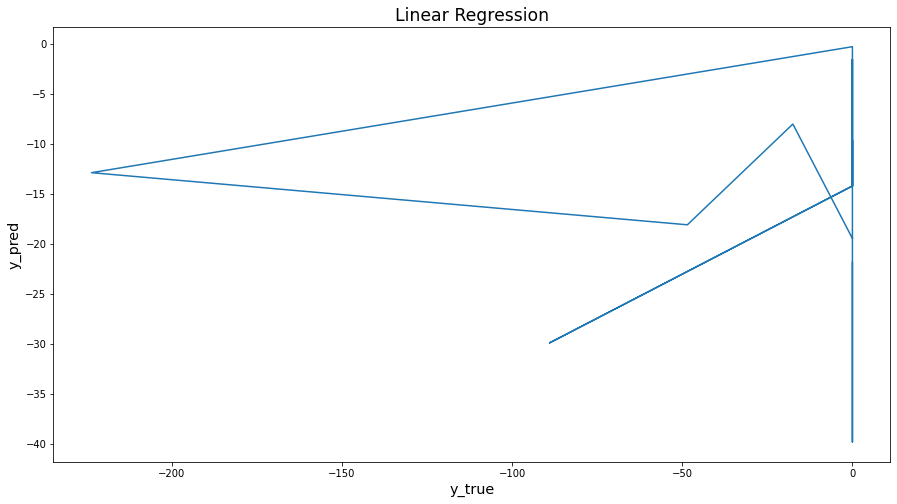

In [37]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(y_test, y_pred)
ax.set_xlabel('y_true', fontsize='x-large')
ax.set_ylabel('y_pred', fontsize='x-large')
ax.set_title('Linear Regression', fontsize='xx-large')
plt.show()


In [38]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=21)

In [39]:
y_pred = tree_reg.predict(X_test)

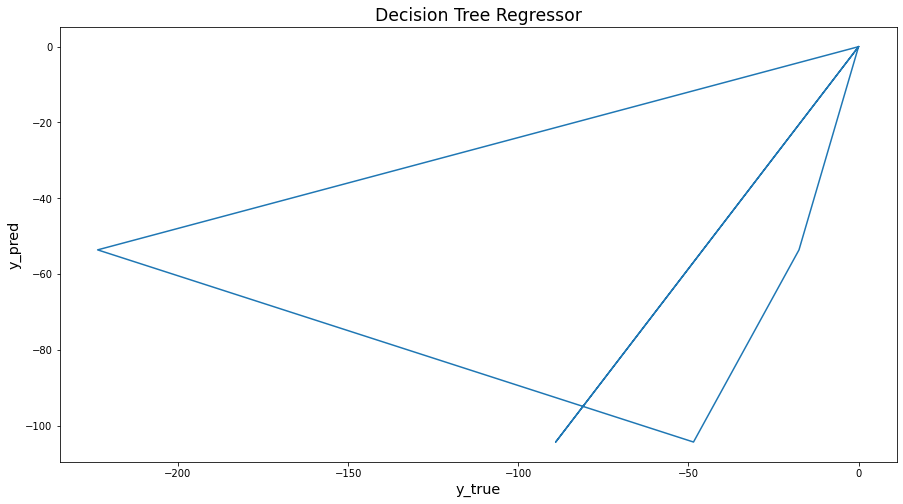

In [40]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(y_test, y_pred)
ax.set_xlabel('y_true', fontsize='x-large')
ax.set_ylabel('y_pred', fontsize='x-large')
ax.set_title('Decision Tree Regressor', fontsize='xx-large')
plt.show()

In [41]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=30, random_state=21)

In [42]:
y_pred = forest_reg.predict(X_test)

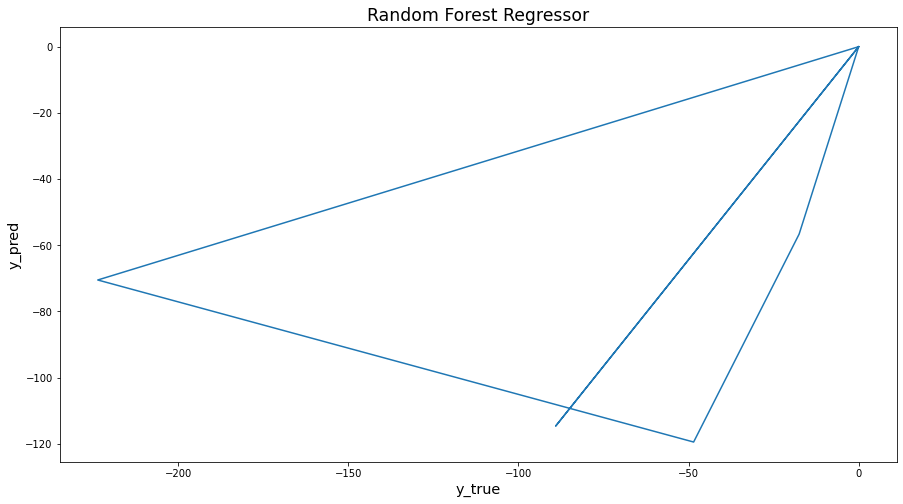

In [43]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(y_test, y_pred)
ax.set_xlabel('y_true', fontsize='x-large')
ax.set_ylabel('y_pred', fontsize='x-large')
ax.set_title('Random Forest Regressor', fontsize='xx-large')
plt.show()